# Глава 4

## Задание 4.1.

Скачать звуки природных источников шума и вычислись спектры каждого сигнала. Определить похож ли спект мощностей на белый, розовый или броуновский шум и как спектр меняется во времени.

С сайта https://freesound.org/ были скачаны и распечатаны образцы звуков дождя и волн.

In [29]:
from thinkdsp import read_wave
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate

rain_wave = read_wave('370284__ztitchez__rain-heavy-early-morning_01.wav')
rain_segment = rain_wave.segment(start=2.5, duration=1.0)
rain_segment.make_audio()

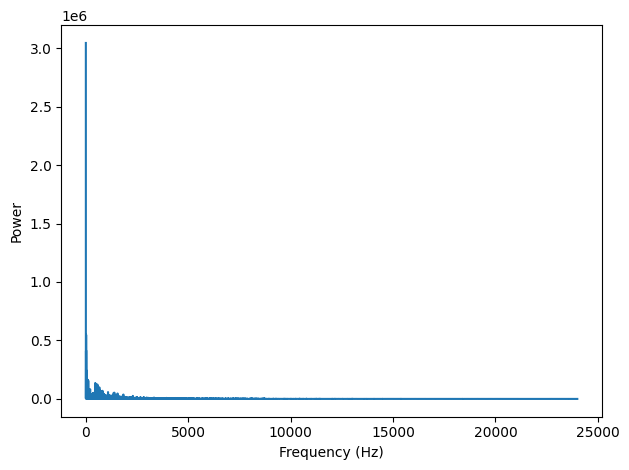

In [30]:
rain_spectrum = rain_segment.make_spectrum()
rain_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

In [31]:
waves_wave = read_wave('234088__ivorybunker__wave_mallorca_1_ibsp2.wav')
waves_segment = waves_wave.segment(start=1.5, duration=1.0)
waves_segment.make_audio()

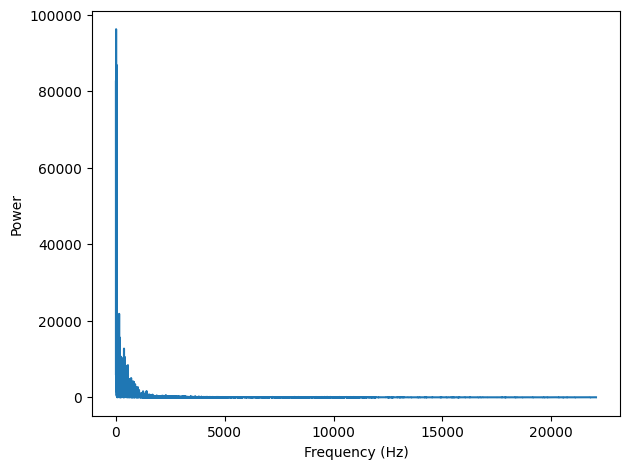

In [32]:
waves_spectrum = waves_segment.make_spectrum()
waves_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Посмотрим на спектры мощностей в логарифмическом формате.

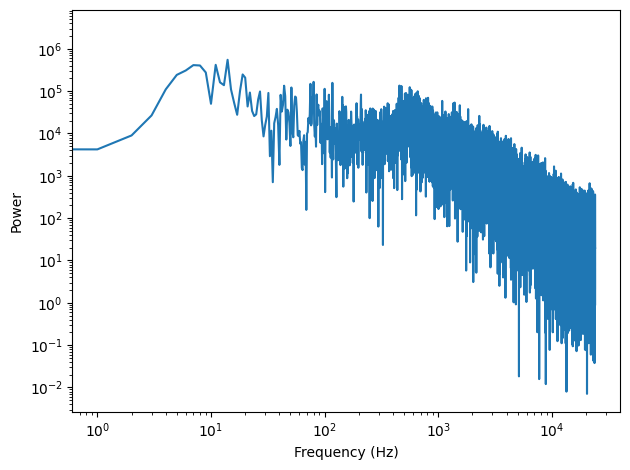

In [33]:
rain_spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

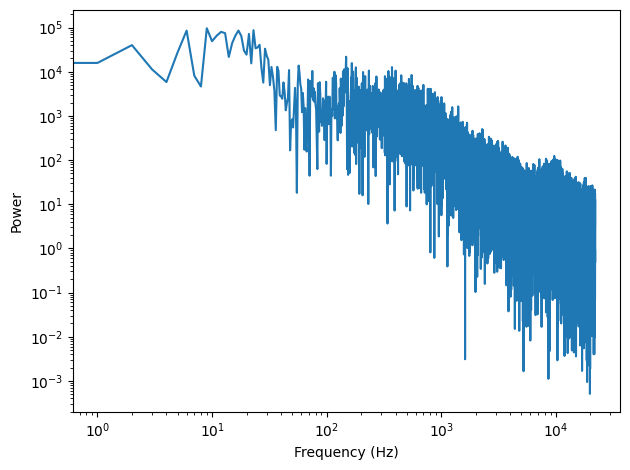

In [34]:
waves_spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Можно заметить, что спектры мощностей обоих звуков похожи на броуновкий шум.

Чтобы увидеть, как меняется спектр с течением времени, выберем другие сегменты для каждого звука:

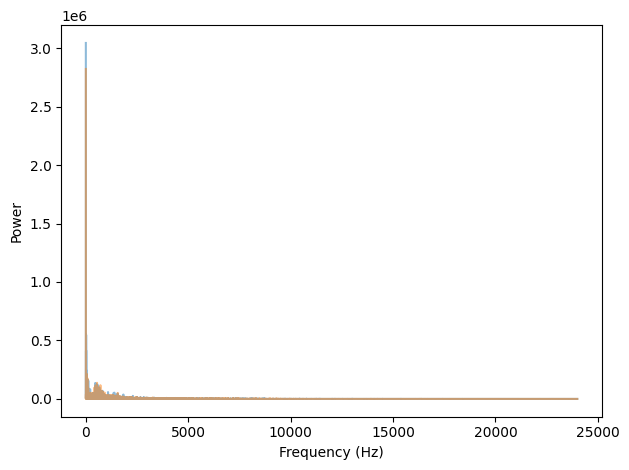

In [36]:
rain_segment2 = rain_wave.segment(start=4.5, duration=1.0)
rain_spectrum2 = rain_segment2.make_spectrum()

rain_spectrum.plot_power(alpha=0.5)
rain_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

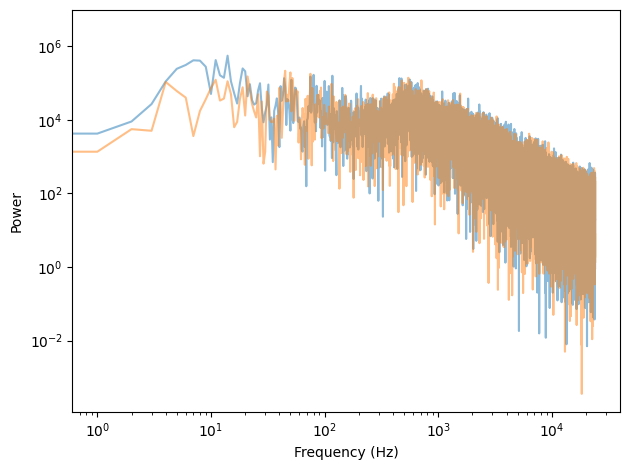

In [37]:
rain_spectrum.plot_power(alpha=0.5)
rain_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

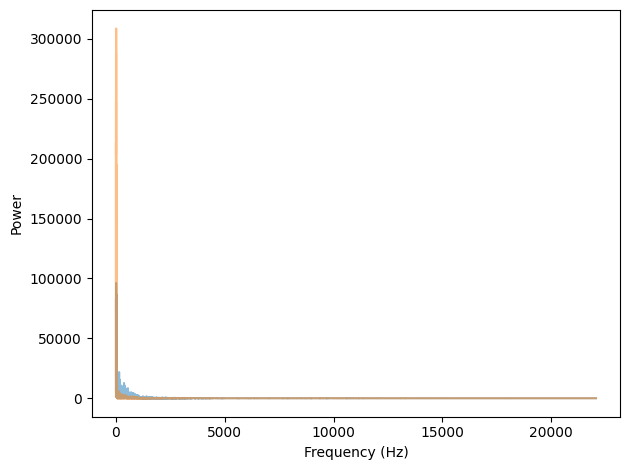

In [45]:
waves_segment2 = waves_wave.segment(start=6.5, duration=1.0)
waves_spectrum2 = waves_segment2.make_spectrum()

waves_spectrum.plot_power(alpha=0.5)
waves_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

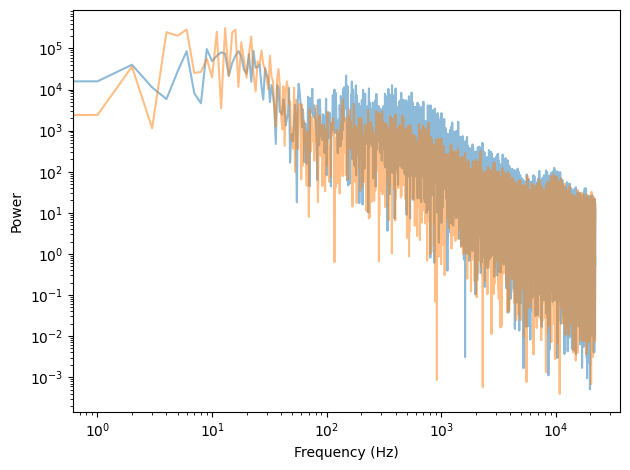

In [47]:
waves_spectrum.plot_power(alpha=0.5)
waves_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Таким образом, можно заметить, что обе структуры, видимо, остаются неизменными с течением времени.

## Задание 4.2.

Реализовать метод Бартлетта и использовать его для оценки спектра мощности шумовой сигнала.

In [55]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()

    psds = [spectrum.power for spectrum in spectrums]

    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs

    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

Метод Барлета используется для того, чтобы разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента и затем найти среднее.

Используем его для оценки спектра мощности шумовой сигнала дождя и волны.

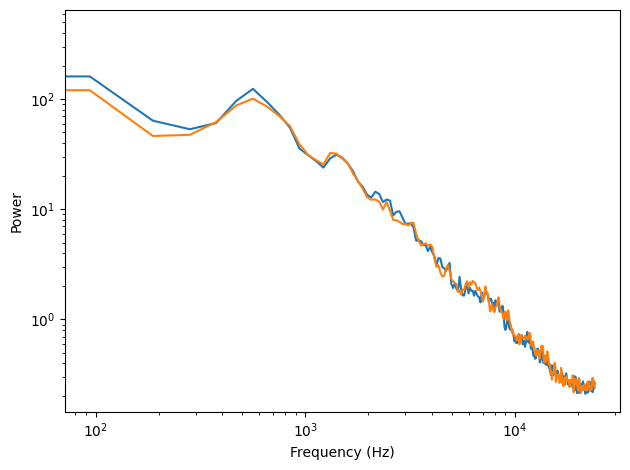

In [56]:
psd = bartlett_method(rain_segment)
psd2 = bartlett_method(rain_segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

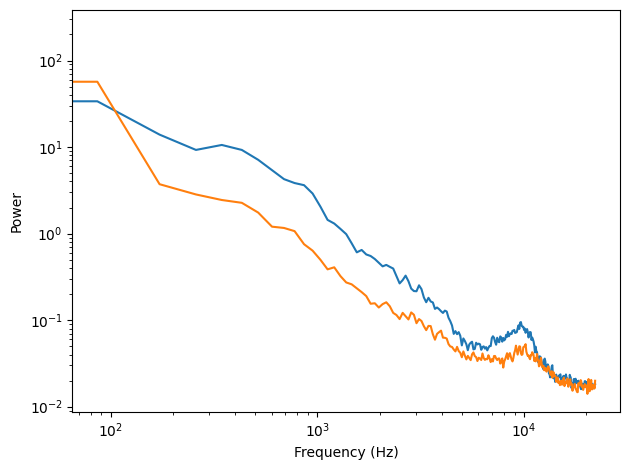

In [57]:
waves_psd = bartlett_method(waves_segment)
waves_psd2 = bartlett_method(waves_segment2)

waves_psd.plot_power()
waves_psd2.plot_power()

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Можно заметить, что взаимосвязь между мощностью и частотой это не простая линейная зависимость, а она и постоянна в разных сегментах, даже в таких деталях, как выемки.

## Задание 4.3.

Открыть данные об истории стоимости BitCoin и вычислить спект цен как функцию во времени. Определить похоже ли это на белый, розовый или броуновский шум.

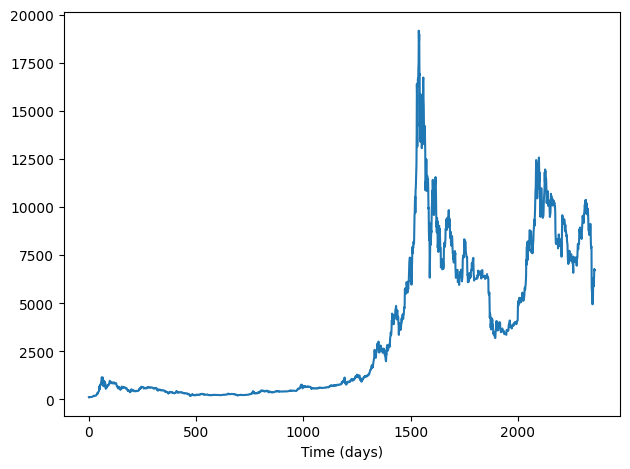

In [61]:
import pandas as pd
from thinkdsp import Wave

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv')
ys = df['Closing Price (USD)']
ts = df.index

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

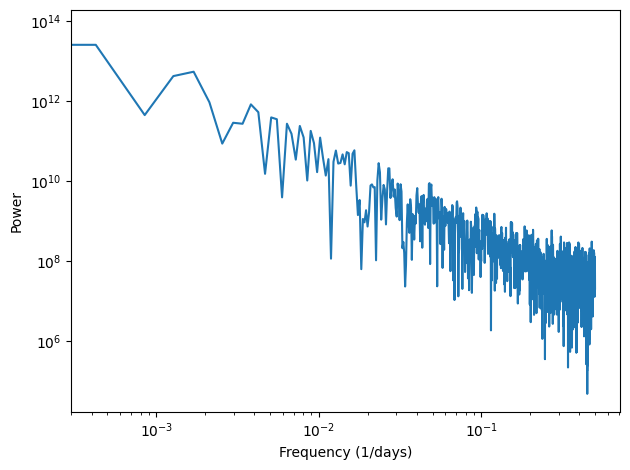

In [62]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power',
         **loglog)

In [63]:
spectrum.estimate_slope()[0]

np.float64(-1.7332540936758924)

Наклон β = -1.7, что находится в пределах от 0 до -2, поэтому
спектр мощности похож на розовый шум.

## Задание 4.4.

Написать класс, называемый UncorrelatedPoissonNoise, наследующий thinkdsp._Noise и предоставляющий evaluate. Сгенерировать пару секунд UP, прослушать и посмотреть, что для малых значений amp звук будет как у счетчика Гейгера, а при больших - как белый шум. Вычислить и напечатать спектр мощности.


In [68]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        return np.random.poisson(self.amp, len(ts))

Проверим, что для малых частот звук будет как у счетчика Гейгера

Writing low_wave.wav


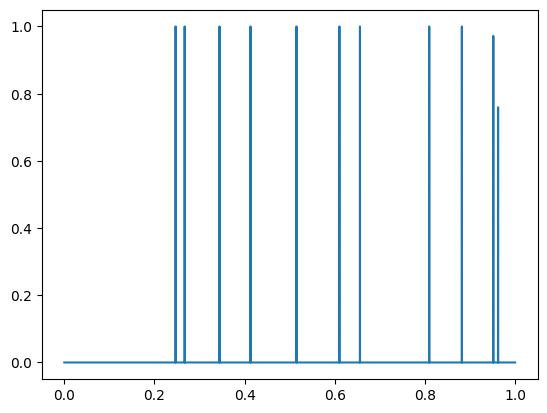

In [79]:
amp = 0.001
framerate = 10000
duration = 1

low_signal = UncorrelatedPoissonNoise(amp=amp)
low_wave = low_signal.make_wave(duration=duration, framerate=framerate)
low_wave.apodize()
low_wave.write("low_wave.wav")
low_wave.plot()

При прослушивании звук дейсвительно как у счетчика Гейгера.

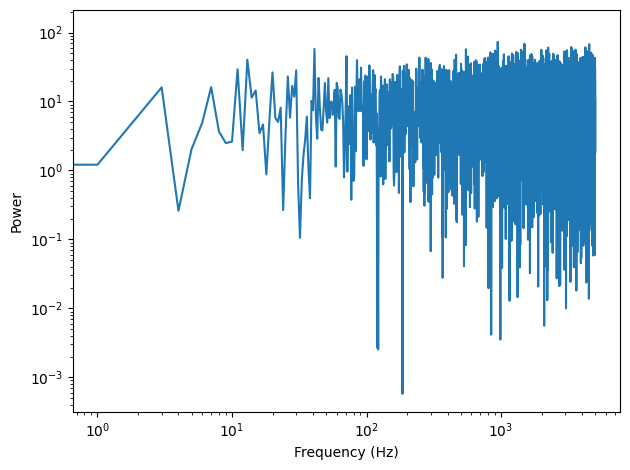

In [80]:
low_spectrum = low_wave.make_spectrum()
low_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [81]:
low_spectrum.estimate_slope().slope

np.float64(0.013383296303081512)

Проверим, что для больших частот звук будет как белый шум.

Writing high_wave.wav


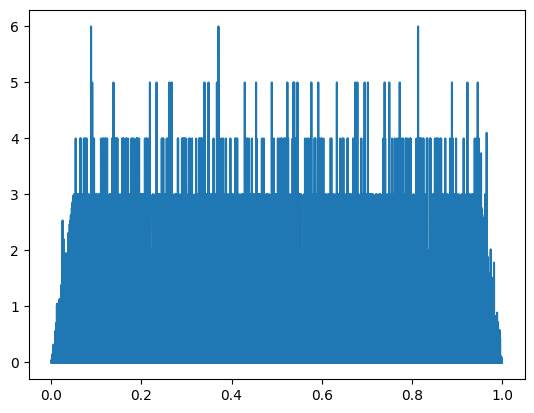

In [92]:
amp = 1
framerate = 10000
duration = 1

high_signal = UncorrelatedPoissonNoise(amp=amp)
high_wave = high_signal.make_wave(duration=duration, framerate=framerate)
high_wave.apodize()
high_wave.write("high_wave.wav")
high_wave.plot()

При прослушивании звук дейсвительно похож на белый шум.

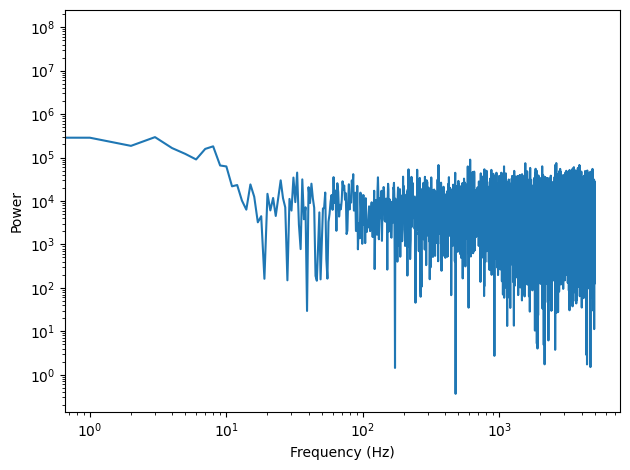

In [93]:
high_spectrum = high_wave.make_spectrum()
high_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [94]:
high_spectrum.estimate_slope().slope

np.float64(-0.033709674170089535)

## Задание 4.5.

Изучить алгоритм Voss-McCartney для генерации розового шума, реализовать его, вычислить спектр результата и убедиться, что соотношение между мощностью и частотой соответствующее.

Фундаментальная идея этого алгоритма заключается в сложении нескольких последовательностей случайных чисел, которые обновляются с разной частотой дискретизации. Первый источник должен обновляться на каждом временном шаге; второй источник - через каждый временной шаг, третий источник - через каждый четвертый шаг и так далее.

In [97]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)

    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df = df.ffill()
    total = df.sum(axis=1)

    return total.values

Writing pink_wave.wav


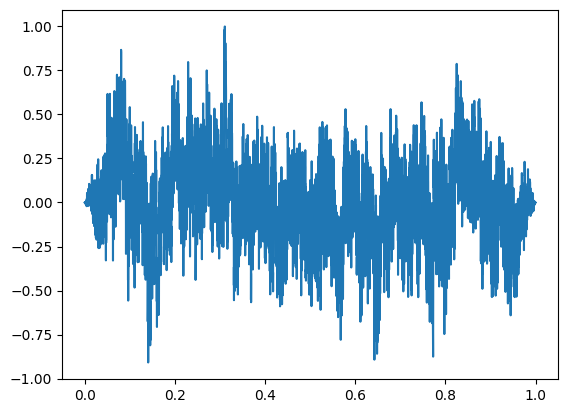

In [101]:
ys = voss(11025)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.apodize()
wave.write("pink_wave.wav")
wave.plot()

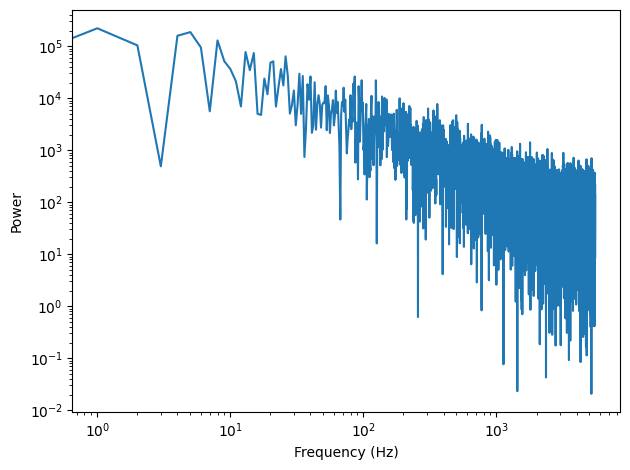

In [102]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [103]:
spectrum.estimate_slope().slope

np.float64(-1.0162040586711019)

Наклон β = -1, что находится в пределах от 0 до -2, поэтому спектр мощности похож на розовый шум => убеждаемся, что соотношение между мощностью и частотой соответствующее.